In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import lightgbm as gbm
import warnings 
warnings.filterwarnings('ignore')

Watch the data inside the csv

In [25]:
data=pd.read_csv('../heart.csv')
print(data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [26]:
data.shape

(918, 12)

In [27]:
data.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

In [28]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [29]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [30]:
data.duplicated().sum()

0

Analysis
with Histogram Discretization

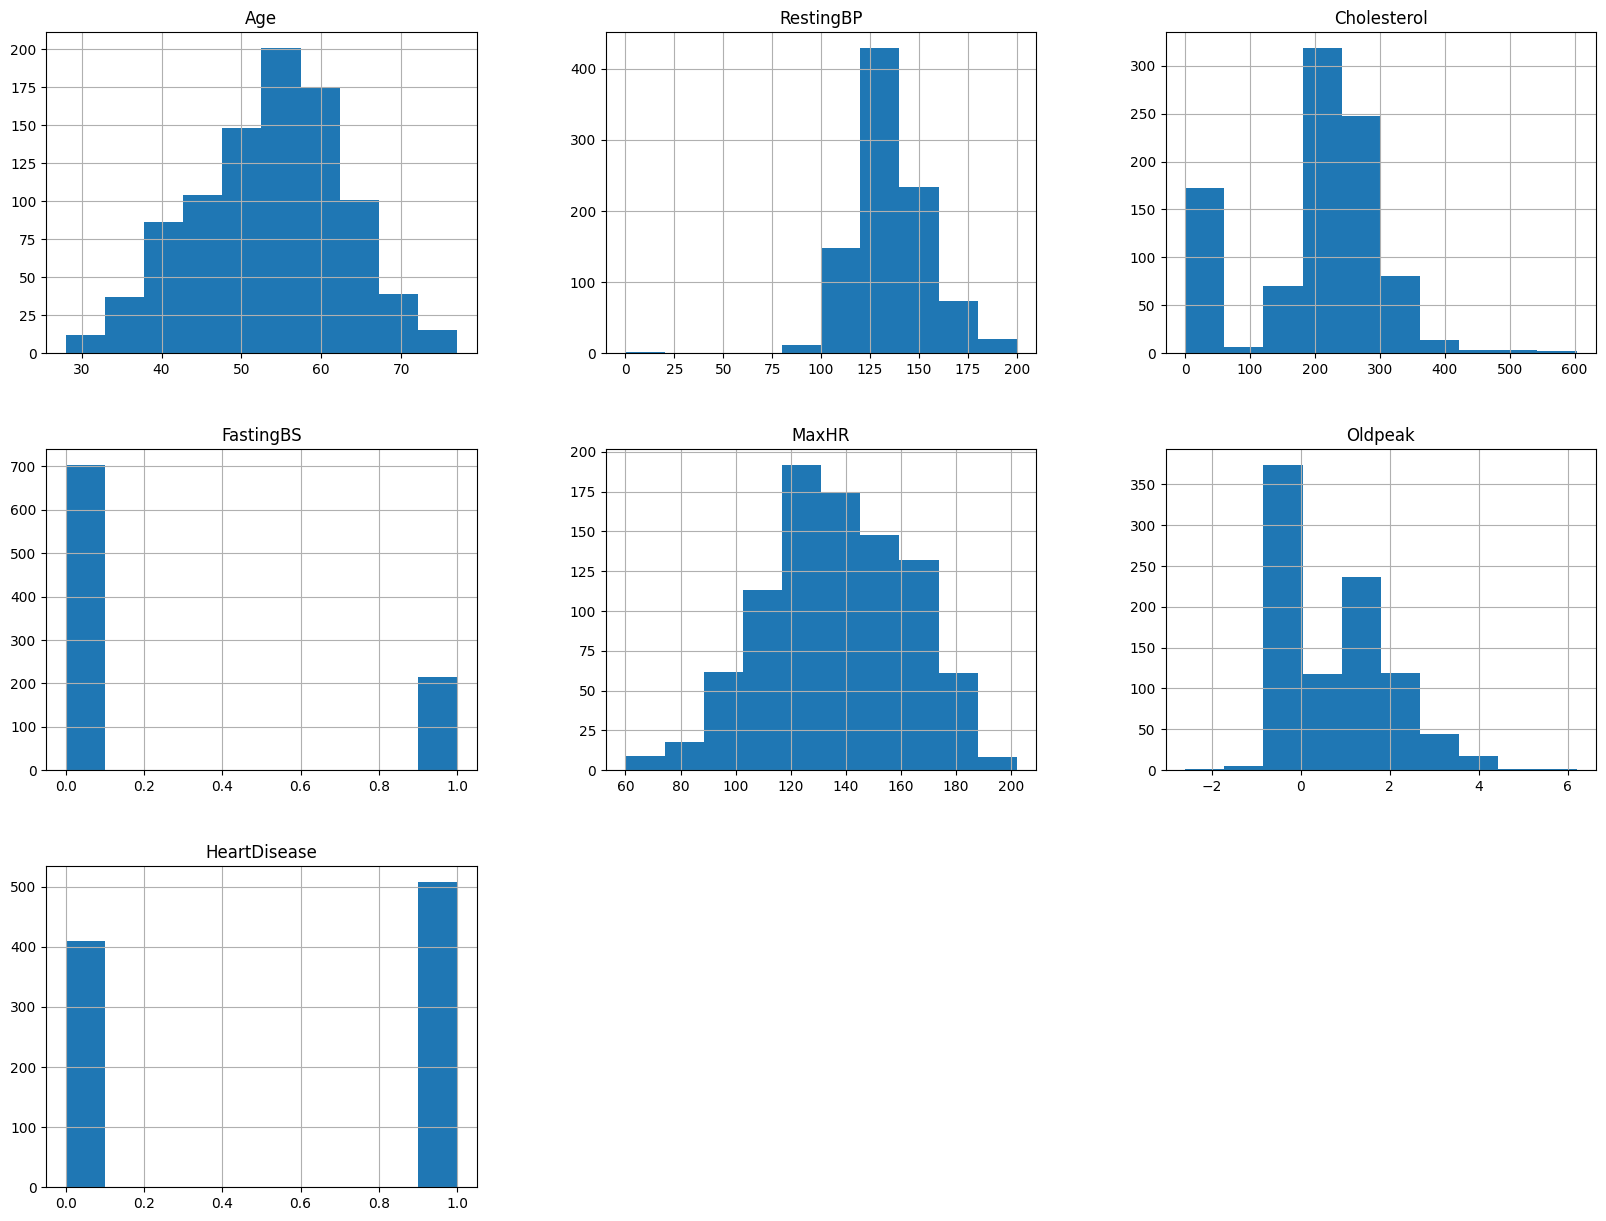

In [31]:
data.hist(figsize=(20,15))
plt.show()

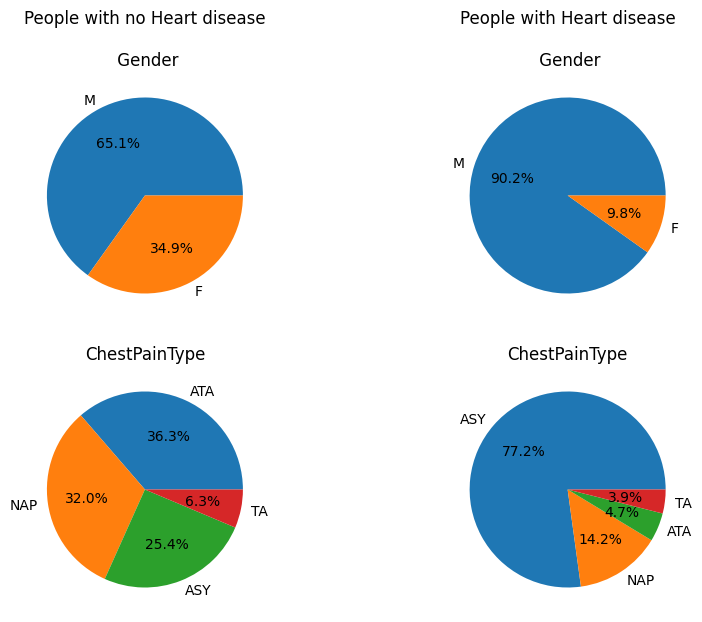

In [32]:
fig,axs = plt.subplots(2,2,figsize = (10,7))
axs[0, 0].pie( data[data.HeartDisease == 0]['Sex'].value_counts(), labels= data[data.HeartDisease == 0]['Sex'].value_counts().index, autopct='%1.1f%%')
axs[0, 1].pie( data[data.HeartDisease == 1]['Sex'].value_counts(), labels= data[data.HeartDisease == 1]['Sex'].value_counts().index, autopct='%1.1f%%')
axs[0,0].set_title("People with no Heart disease\n\n Gender")
axs[0,1].set_title("People with Heart disease\n\n Gender")
axs[1, 0].pie( data[data.HeartDisease == 0]['ChestPainType'].value_counts(), labels= data[data.HeartDisease == 0]['ChestPainType'].value_counts().index, autopct='%1.1f%%')
axs[1, 1].pie( data[data.HeartDisease == 1]['ChestPainType'].value_counts(), labels= data[data.HeartDisease == 1]['ChestPainType'].value_counts().index, autopct='%1.1f%%')
axs[1,0].set_title("ChestPainType")
axs[1,1].set_title("ChestPainType")
plt.show()

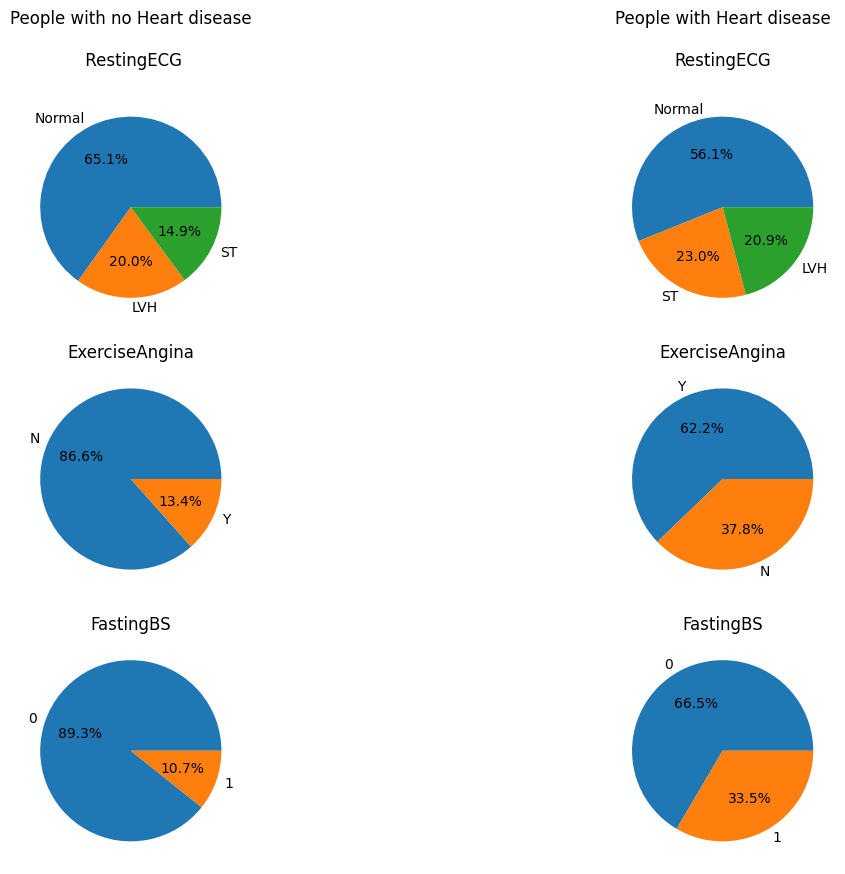

In [33]:
fig,axs = plt.subplots(3,2,figsize = (14,10))
axs[0, 0].pie( data[data.HeartDisease == 0]['RestingECG'].value_counts(), labels= data[data.HeartDisease == 0]['RestingECG'].value_counts().index, autopct='%1.1f%%')
axs[0, 1].pie( data[data.HeartDisease == 1]['RestingECG'].value_counts(), labels= data[data.HeartDisease == 1]['RestingECG'].value_counts().index, autopct='%1.1f%%')
axs[0,0].set_title("People with no Heart disease\n\n RestingECG\n")
axs[0,1].set_title("People with Heart disease\n\nRestingECG\n")
axs[1, 0].pie( data[data.HeartDisease == 0]['ExerciseAngina'].value_counts(), labels= data[data.HeartDisease == 0]['ExerciseAngina'].value_counts().index, autopct='%1.1f%%')
axs[1,0].set_title("ExerciseAngina")
axs[1, 1].pie( data[data.HeartDisease == 1]['ExerciseAngina'].value_counts(), labels= data[data.HeartDisease == 1]['ExerciseAngina'].value_counts().index, autopct='%1.1f%%')
axs[1,1].set_title("ExerciseAngina")
axs[2, 0].pie( data[data.HeartDisease == 0]['FastingBS'].value_counts(), labels= data[data.HeartDisease == 0]['FastingBS'].value_counts().index, autopct='%1.1f%%')
axs[2,0].set_title("FastingBS")
axs[2, 1].pie( data[data.HeartDisease == 1]['FastingBS'].value_counts(), labels= data[data.HeartDisease == 1]['FastingBS'].value_counts().index, autopct='%1.1f%%')
axs[2,1].set_title("FastingBS")
plt.show()

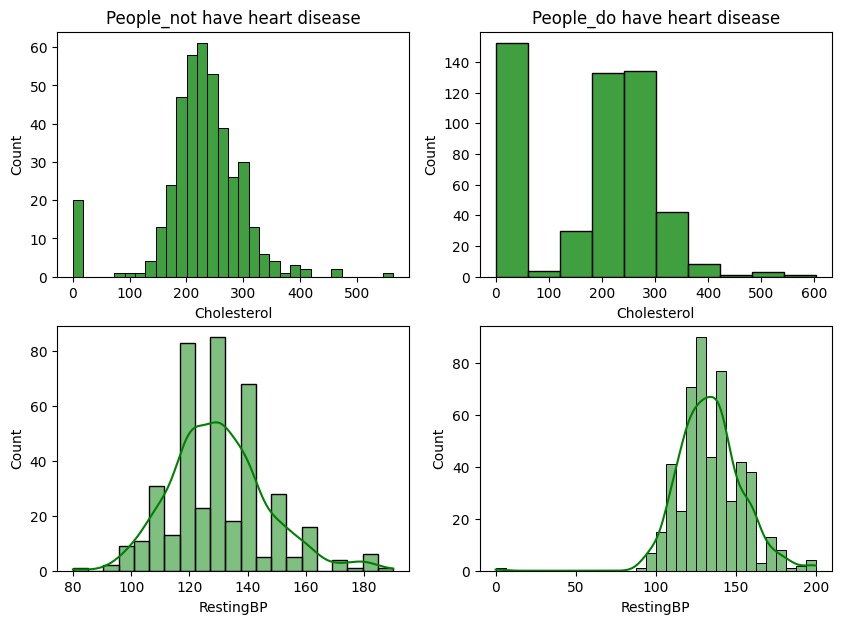

In [34]:
fig,axs = plt.subplots(2,2,figsize = (10,7))
sns.histplot(data[data.HeartDisease ==0].Cholesterol,ax = axs[0,0],color = 'green')
axs[0,0].set_title("People_not have heart disease")
sns.histplot(data[data.HeartDisease ==1].Cholesterol,ax = axs[0,1],color = 'green')
axs[0,1].set_title("People_do have heart disease")
sns.histplot(data[data.HeartDisease ==0].RestingBP,ax = axs[1,0],kde = True,color = 'green')
sns.histplot(data[data.HeartDisease ==1].RestingBP,ax = axs[1,1],kde = True,color = 'green')
plt.show()

In [35]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

Exploratory Data Analysis (EDA)
start by visualizing the distribution of some key features.

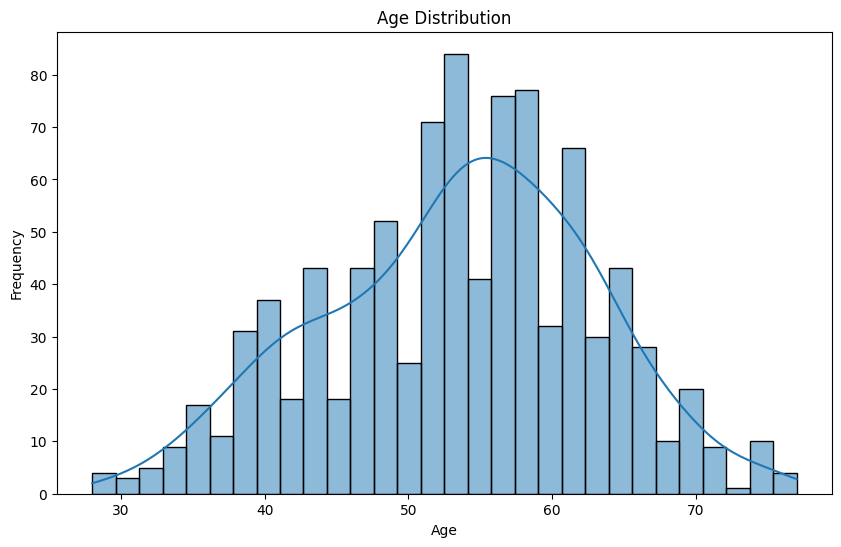

In [50]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [36]:
x=data.drop('HeartDisease', axis=1).values.reshape(-1,1)
y=data['HeartDisease'].values.reshape(-1,1)

In [37]:
item=['RestingBP','Cholesterol']
for i in range(len(item)):
    print(f'nl \n ',data[item[i]].nlargest(3))
    print(f'ns \n ',data[item[i]].nsmallest(3))

print(f'nl \n ',data['MaxHR'].nlargest(3))
print(f'ns \n ',data['MaxHR'].nsmallest(3))

nl 
  241    200
365    200
399    200
Name: RestingBP, dtype: int64
ns 
  449     0
314    80
227    92
Name: RestingBP, dtype: int64
nl 
  149    603
616    564
76     529
Name: Cholesterol, dtype: int64
ns 
  293    0
294    0
295    0
Name: Cholesterol, dtype: int64
nl 
  829    202
759    195
795    194
Name: MaxHR, dtype: int64
ns 
  390    60
370    63
402    67
Name: MaxHR, dtype: int64


In [38]:
print(data.dtypes)
data['RestingBP'] = pd.to_numeric(data['RestingBP'], errors='coerce')
data['Cholesterol'] = pd.to_numeric(data['Cholesterol'], errors='coerce')
data['RestingBP']=data['RestingBP'].apply(lambda x: np.nan if x > 140 else x)
data['RestingBP']=data['RestingBP'].apply(lambda x: np.nan if x < 40 else x)
data['Cholesterol']=data['Cholesterol'].replace(0,np.nan)

print(data.isna().sum())
data['RestingBP']=data['RestingBP'].replace(np.nan,data['RestingBP'].median())
data['Cholesterol']=data['Cholesterol'].replace(np.nan,data['Cholesterol'].median())
print(data.isna().sum())

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object
Age                 0
Sex                 0
ChestPainType       0
RestingBP         221
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [39]:
x=data.drop('HeartDisease',axis=1)
y=data['HeartDisease']

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
201   46    1              2      120.0        230.0          0           1   
331   56    1              0      115.0        237.0          1           2   
268   54    1              0      130.0        242.0          0           1   
59    52    1              0      112.0        342.0          0           2   
649   50    1              0      126.0        200.0          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
767   54    0              2      108.0        267.0          0           0   
72    52    1              0      120.0        182.0          0           1   
908   63    1              0      140.0        187.0          0           0   
235   39    1              1      120.0        200.0          0           1   
37    41    0              1      110.0        250.0          0           2   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
201

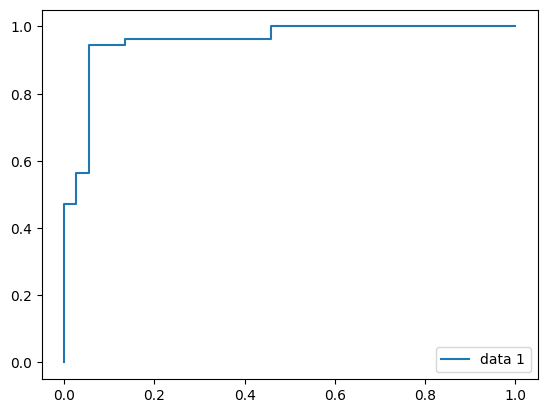

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.1, random_state = 1)
print(X_train)
print(Y_train)
clf=LogisticRegression(max_iter=320, solver='liblinear')
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print(classification_report(Y_test,y_pred))
clf.score(x,y)
LOAC=metrics.accuracy_score(Y_test,y_pred)
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

In [41]:
k=20
acc=np.zeros((k))
for i in range (1,k+1):
    nclf=KNeighborsClassifier(n_neighbors=i)
    nclf.fit(X_train,Y_train)
    ny_pred=nclf.predict(X_test)
    acc[i-1]=metrics.accuracy_score(Y_test,ny_pred)
# print(acc)
# print(acc.max())
nclf=KNeighborsClassifier(n_neighbors=9)
nclf.fit(X_train,Y_train)
ny_pred=nclf.predict(X_test)
KNAC=metrics.accuracy_score(Y_test,ny_pred)
print(classification_report(Y_test,ny_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        37
           1       0.80      0.80      0.80        55

    accuracy                           0.76        92
   macro avg       0.75      0.75      0.75        92
weighted avg       0.76      0.76      0.76        92



|--- feature_10 <= 1.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 1
|   |--- feature_2 >  0.50
|   |   |--- feature_7 <= 151.00
|   |   |   |--- class: 1
|   |   |--- feature_7 >  151.00
|   |   |   |--- class: 0
|--- feature_10 >  1.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_9 <= 0.45
|   |   |   |--- class: 0
|   |   |--- feature_9 >  0.45
|   |   |   |--- class: 1
|   |--- feature_2 >  0.50
|   |   |--- feature_9 <= 2.20
|   |   |   |--- class: 0
|   |   |--- feature_9 >  2.20
|   |   |   |--- class: 1

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


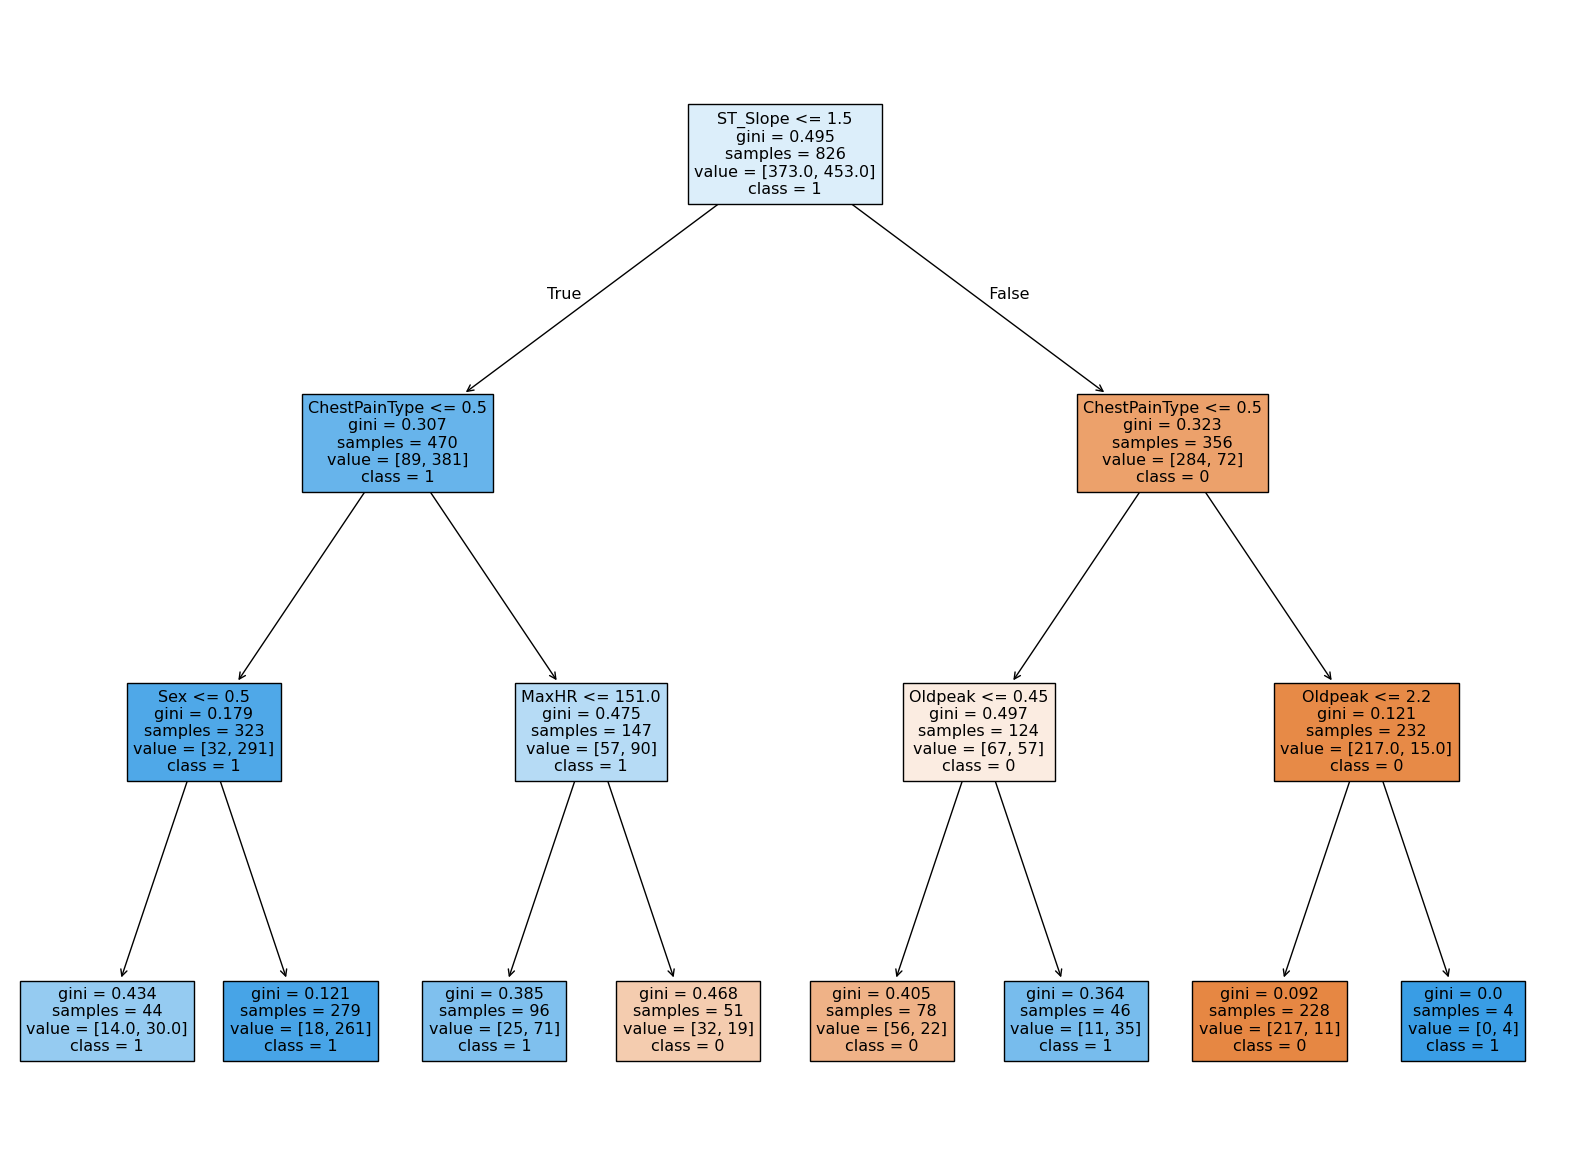

In [42]:
dtclf=DecisionTreeClassifier(max_depth=3)
dtclf.fit(X_train,Y_train)
dty_pred=dtclf.predict(X_test)
DTAC=metrics.accuracy_score(Y_test,dty_pred)
text_representation=tree.export_text(dtclf)
print(text_representation)
print(data.columns)
f_n=["Age","Sex","ChestPainType","RestingBP","Cholesterol","FastingBS","RestingECG","MaxHR","ExerciseAngina","Oldpeak",'ST_Slope']
t_n=["0","1"]
fig=plt.figure(figsize=(20,15),dpi=100)
plot=tree.plot_tree(dtclf,feature_names=f_n,class_names=t_n,filled=True)
plt.show()

Correlation Heatmap
see how the numeric features correlate with each other.

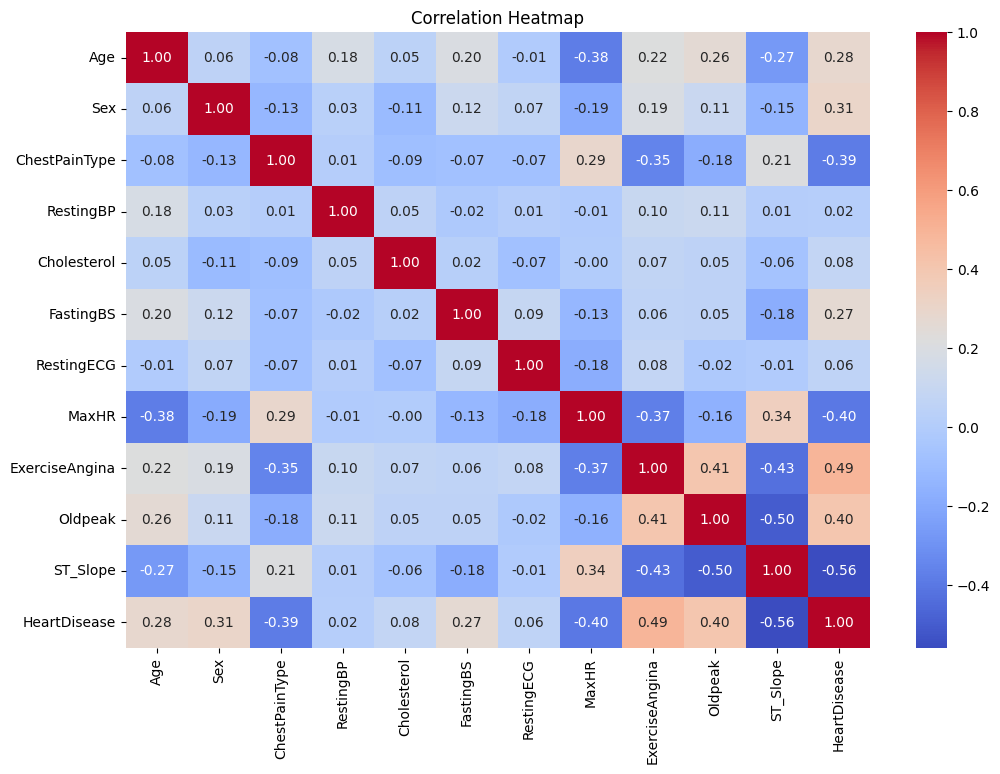

In [43]:
# Correlation heatmap
numeric_df = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [44]:
rfclf=RandomForestClassifier(n_estimators=160,max_depth=5,random_state=110)
rfclf.fit(X_train,Y_train)
rfy_pred=rfclf.predict(X_test)
RFAC=metrics.accuracy_score(Y_test,rfy_pred)
print(classification_report(Y_test,rfy_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        37
           1       0.96      0.96      0.96        55

    accuracy                           0.96        92
   macro avg       0.95      0.95      0.95        92
weighted avg       0.96      0.96      0.96        92



In [45]:
Gclf=GaussianNB()
Gclf.fit(X_train,Y_train)
Gy_pred=Gclf.predict(X_test)
GAC=metrics.accuracy_score(Y_test,Gy_pred)
print(GAC)

0.9239130434782609


In [46]:
svcclf=SVC(kernel='linear')
svcclf.fit(X_train,Y_train)
svcy_pred=svcclf.predict(X_test)
svcAC=metrics.accuracy_score(Y_test,svcy_pred)
print(svcAC)

0.9565217391304348


In [47]:
lgb_model = gbm.LGBMClassifier()
lgb_model.fit(X_train, Y_train)
gbmy_pred = lgb_model.predict(X_test)
metrics.accuracy_score(Y_test, gbmy_pred)
print(metrics.accuracy_score(Y_test, gbmy_pred))

[LightGBM] [Info] Number of positive: 453, number of negative: 373
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 826, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.548426 -> initscore=0.194314
[LightGBM] [Info] Start training from score 0.194314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0.9456521739130435


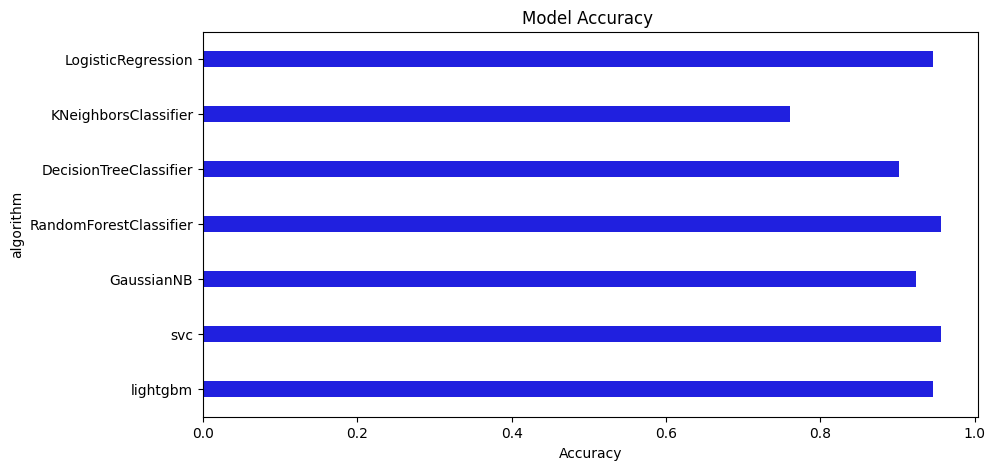

In [48]:
compar=pd.DataFrame(columns=["algorithm","Accuracy"])
compar.loc[len(compar)] = ['LogisticRegression', LOAC]
compar.loc[len(compar)] = ['KNeighborsClassifier', KNAC]
compar.loc[len(compar)] = ['DecisionTreeClassifier', DTAC]
compar.loc[len(compar)] = ['RandomForestClassifier', RFAC]
compar.loc[len(compar)] = ['GaussianNB', GAC]
compar.loc[len(compar)] = ['svc', svcAC]
compar.loc[len(compar)] = ['lightgbm', metrics.accuracy_score(Y_test,gbmy_pred)]
plt.figure(figsize=[10,5])
plt.title('Model Accuracy ')
sns.barplot(x='Accuracy', y='algorithm', data=compar ,width=0.3,color='blue')
plt.show()

In [49]:
print(compar)

                algorithm  Accuracy
0      LogisticRegression  0.945652
1    KNeighborsClassifier  0.760870
2  DecisionTreeClassifier  0.902174
3  RandomForestClassifier  0.956522
4              GaussianNB  0.923913
5                     svc  0.956522
6                lightgbm  0.945652
